### <center>  Machine Learning for Developers(MLDP) </center>
### <center>  Individual Assignment</center>

## Importing Dataset and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stroke_data.csv')

## <font color= grey> Getting Idea of Dataset

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## <font color= grey> Data Dictionary

1) id: unique identifier
2) gender: Patient gender, including "Male", "Female" or "Other"
3) age: Age of the patient
4) hypertension: 0 if the patient does not have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient does not have any heart diseases, 1 if the patient has a heart disease
6) ever_married: Has the patient ever been married? "No" or "Yes"
7) work_type: Work type of patient. "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: Residence type of patient. "Rural" or "Urban"
9) avg_glucose_level: Average glucose level in blood
10) bmi: Body mass index
11) smoking_status: Smoking status of patient. "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient. In this case I will treat it as missing value

# <font color= maroon> Data Preparation

## <font color= grey> Data Cleaning

In [6]:
#Checking for duplicates
df.loc[df.duplicated(),:]

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

In [7]:
#Standardise the column names to be in lower case
df=df.rename(columns=lambda s: s.lower())
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#Look for columns with null value
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#col 'id' is not necessary for our analysis
df=df.drop(columns='id')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
#checking through whether there are irrelevant values in all the columns
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [12]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [13]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [14]:
df.residence_type.value_counts()

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

In [15]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [16]:
#Replacing values in 'work_type' for higher readability
df.work_type=df.work_type.replace(['children','Govt_job','Never_worked'],['Underage','Government job','Never'])
df.work_type.value_counts()

Private           2925
Self-employed      819
Underage           687
Government job     657
Never               22
Name: work_type, dtype: int64

In [17]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [18]:
#As suggested in description, 'Unknown' in column 'smoking_status' means the value is 
#unavailable for the patient and will be seen as missing value. Hence convert 'Unknown' to nan
df.smoking_status=df.smoking_status.replace(['smokes','never smoked','formerly smoked','Unknown'],
                                            ['Smokes','Never','Formerly smoked',np.nan])
df.smoking_status.value_counts()

Never              1892
Formerly smoked     885
Smokes              789
Name: smoking_status, dtype: int64

In [19]:
#Check for null values again
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [20]:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

A person is considered obese with a Body-Mass Index(BMI) above 30. In usual cases, a normal person's BMI is capped below 50, but the maximum value in the column 'bmi' is 97.6. Hence, these numbers should be seen as outliers and should be capped at 50 based on my knowledge.

In [21]:
#Correcting outliers
outliers = df.loc[df.bmi > 50]
outliers.bmi.shape

(79,)

In [22]:
print(outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


In [23]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

## <font color= grey> Dealing with Missing Values

In [24]:
#create a copy of df to fill in missing values via KNNImputer
df_enc = df.copy()

In [25]:
#define class 'cleaning' to encode the dataframe
class cleaning:
    def encoding(self, data):
        #define an empty dictionary to store the columns names and the functions used
        self.dict = {}
        for col_name in data:
            dtype = str(data[col_name].dtype)
            #Select float columns for scaling
            if dtype.find('float') != -1:
                self.dict[col_name] = StandardScaler()
                
                col = data[col_name]
                #Get the non-null values of the column
                col_notna = col[col.notnull()]
                #Reshape the column into an numpy array that has a shape of (-1,1)
                reshaped = col_notna.values.reshape(-1,1)
                #Encode the array that was reshaped
                encoded = self.dict[col_name].fit_transform(reshaped)
                #Replace the original data with encoded data
                data.loc[col.notnull(),col_name] = np.squeeze(encoded)
            else:
                self.dict[col_name] = LabelEncoder()
                col = data[col_name]
                #Get the non-null values of the column
                col_notna = col[col.notnull()]
                #Reshape the column into an numpy array that has a shape of (-1,1)
                reshaped = col_notna.values.reshape(-1,1)
                #Encode the array that was reshaped
                encoded = self.dict[col_name].fit_transform(reshaped)
                #Replace the original data with encoded data
                data.loc[col.notnull(),col_name] = np.squeeze(encoded)
        return data
        
    def decoding(self, data):
        for col in data:
            if col in self.dict:
                #Reshape the data again
                reshaped = data[col].values.reshape(-1,1)
                #Do inverse_transform() to decode the encoded data and replace the encoded data with its decoded form
                data[col] = self.dict[col].inverse_transform(reshaped)

In [26]:
#Encode the dataset
enc = cleaning()
enc.encoding(df_enc)
df_enc

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  1.051434             0              1             1          2   
1          0  0.786070             0              0             1          3   
2          1  1.626390             0              1             1          2   
3          0  0.255342             0              0             1          2   
4          0  1.582163             1              0             1          3   
...      ...       ...           ...            ...           ...        ...   
5105       0  1.626390             1              0             1          2   
5106       0  1.670617             0              0             1          3   
5107       0 -0.363842             0              0             1          3   
5108       1  0.343796             0              0             1          2   
5109       0  0.034205             0              0             1          0   

      residence_type  avg_glucose_level       bmi smoking_status  stroke  
0                  1           2.706375  1.046096              0       1  
1                  0           2.121559       NaN              1       1  
2                  0          -0.005028  0.496826              1       1  
3                  1           1.437358  0.751366              2       1  
4                  0           1.501184 -0.641904              1       1  
...              ...                ...       ...            ...     ...  
5105               1          -0.494658       NaN              1       0  
5106               1           0.420775  1.501588              1       0  
5107               0          -0.511443  0.242286              1       0  
5108               0           1.328257 -0.427555              0       0  
5109               1          -0.460867 -0.347174            NaN       0  

[5110 rows x 11 columns]

In [27]:
#Impute all missing values
imputer = KNNImputer()

int_cols = {}
#Ensure that the ordinal columns are remained as int type so that it can be inverse_transform() by LabelEncoder()
for col in df_enc:
    dtype = str(df_enc[col].dtype)
    if dtype.find('int') != -1 or dtype.find('object') != -1:
        int_cols[col] = 'int'
df_enc.iloc[:,:] = imputer.fit_transform(df_enc)
df_enc = df_enc.astype(int_cols)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int32  
 3   heart_disease      5110 non-null   int32  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int32  
dtypes: float64(3), int32(8)
memory usage: 279.6 KB


In [28]:
#Perform descaling
enc.decoding(df_enc)
df_enc

gender   age  hypertension  heart_disease ever_married       work_type  \
0       Male  67.0             0              1          Yes         Private   
1     Female  61.0             0              0          Yes   Self-employed   
2       Male  80.0             0              1          Yes         Private   
3     Female  49.0             0              0          Yes         Private   
4     Female  79.0             1              0          Yes   Self-employed   
...      ...   ...           ...            ...          ...             ...   
5105  Female  80.0             1              0          Yes         Private   
5106  Female  81.0             0              0          Yes   Self-employed   
5107  Female  35.0             0              0          Yes   Self-employed   
5108    Male  51.0             0              0          Yes         Private   
5109  Female  44.0             0              0          Yes  Government job   

     residence_type  avg_glucose_level    bmi   smoking_status  stroke  
0             Urban             228.69  36.60  Formerly smoked       1  
1             Rural             202.21  31.90            Never       1  
2             Rural             105.92  32.50            Never       1  
3             Urban             171.23  34.40           Smokes       1  
4             Rural             174.12  24.00            Never       1  
...             ...                ...    ...              ...     ...  
5105          Urban              83.75  29.16            Never       0  
5106          Urban             125.20  40.00            Never       0  
5107          Rural              82.99  30.60            Never       0  
5108          Rural             166.29  25.60  Formerly smoked       0  
5109          Urban              85.28  26.20            Never       0  

[5110 rows x 11 columns]

In [29]:
#Double check whether there are still missing values
df_enc.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [30]:
df = df_enc

In [31]:
#Replace binary values in 'hypertension', 'heart_disease' and 'stroke' with 'Yes' and 'No'
df = df.replace(to_replace={
             'hypertension':{0:'No',1:'Yes'}, 
             'heart_disease':{0:'No',1:'Yes'},
             'stroke':{0:'No',1:'Yes'}})
df

gender   age hypertension heart_disease ever_married       work_type  \
0       Male  67.0           No           Yes          Yes         Private   
1     Female  61.0           No            No          Yes   Self-employed   
2       Male  80.0           No           Yes          Yes         Private   
3     Female  49.0           No            No          Yes         Private   
4     Female  79.0          Yes            No          Yes   Self-employed   
...      ...   ...          ...           ...          ...             ...   
5105  Female  80.0          Yes            No          Yes         Private   
5106  Female  81.0           No            No          Yes   Self-employed   
5107  Female  35.0           No            No          Yes   Self-employed   
5108    Male  51.0           No            No          Yes         Private   
5109  Female  44.0           No            No          Yes  Government job   

     residence_type  avg_glucose_level    bmi   smoking_status stroke  
0             Urban             228.69  36.60  Formerly smoked    Yes  
1             Rural             202.21  31.90            Never    Yes  
2             Rural             105.92  32.50            Never    Yes  
3             Urban             171.23  34.40           Smokes    Yes  
4             Rural             174.12  24.00            Never    Yes  
...             ...                ...    ...              ...    ...  
5105          Urban              83.75  29.16            Never     No  
5106          Urban             125.20  40.00            Never     No  
5107          Rural              82.99  30.60            Never     No  
5108          Rural             166.29  25.60  Formerly smoked     No  
5109          Urban              85.28  26.20            Never     No  

[5110 rows x 11 columns]

In [32]:
#Store cleaned data as a new csv file
df.to_csv('stroke_data_cleaned.csv')

## <font color= grey> Data Exploration

### <font color= grey> Correlation

In [33]:
# In order to look for correlation between columns and our final target, the columns in dataset needs to be converted to categorical data
df_enc.age = pd.cut(df_enc.age,bins=[0,1,5,13,21,45,60,150],labels=['Infants','Toddlers','Children','Teens','Adults','Middle-age','Elderly'])
df_enc.avg_glucose_level = pd.cut(df_enc.avg_glucose_level,bins=[0,90,160,230,500],labels=['Low','Normal','High','Very High'])
df_enc.bmi = pd.cut(df_enc.bmi, bins=[0,19,25,30,100],labels = ['Underweight', 'Ideal','Overweight', 'Obese'])
df_enc

gender         age  hypertension  heart_disease ever_married  \
0       Male     Elderly             0              1          Yes   
1     Female     Elderly             0              0          Yes   
2       Male     Elderly             0              1          Yes   
3     Female  Middle-age             0              0          Yes   
4     Female     Elderly             1              0          Yes   
...      ...         ...           ...            ...          ...   
5105  Female     Elderly             1              0          Yes   
5106  Female     Elderly             0              0          Yes   
5107  Female      Adults             0              0          Yes   
5108    Male  Middle-age             0              0          Yes   
5109  Female      Adults             0              0          Yes   

           work_type residence_type avg_glucose_level         bmi  \
0            Private          Urban              High       Obese   
1      Self-employed          Rural              High       Obese   
2            Private          Rural            Normal       Obese   
3            Private          Urban              High       Obese   
4      Self-employed          Rural              High       Ideal   
...              ...            ...               ...         ...   
5105         Private          Urban               Low  Overweight   
5106   Self-employed          Urban            Normal       Obese   
5107   Self-employed          Rural               Low       Obese   
5108         Private          Rural              High  Overweight   
5109  Government job          Urban               Low  Overweight   

       smoking_status  stroke  
0     Formerly smoked       1  
1               Never       1  
2               Never       1  
3              Smokes       1  
4               Never       1  
...               ...     ...  
5105            Never       0  
5106            Never       0  
5107            Never       0  
5108  Formerly smoked       0  
5109            Never       0  

[5110 rows x 11 columns]

In [34]:
df_enc = df_enc.astype({'age':'object',
                'avg_glucose_level':'object',
                'bmi':'object'})
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   object
 2   hypertension       5110 non-null   int64 
 3   heart_disease      5110 non-null   int64 
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   object
 8   bmi                5110 non-null   object
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 439.3+ KB


In [35]:
#Encode the dataset
df_c = enc.encoding(df_enc)
df_c

gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1    2             0              1             1          2   
1          0    2             0              0             1          3   
2          1    2             0              1             1          2   
3          0    4             0              0             1          2   
4          0    2             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0    2             1              0             1          2   
5106       0    2             0              0             1          3   
5107       0    0             0              0             1          3   
5108       1    4             0              0             1          2   
5109       0    0             0              0             1          0   

      residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                  1                  0    1               0       1  
1                  0                  0    1               1       1  
2                  0                  2    1               1       1  
3                  1                  0    1               2       1  
4                  0                  0    0               1       1  
...              ...                ...  ...             ...     ...  
5105               1                  1    2               1       0  
5106               1                  2    1               1       0  
5107               0                  1    1               1       0  
5108               0                  0    2               0       0  
5109               1                  1    2               1       0  

[5110 rows x 11 columns]

In [36]:
#This function is to plot the cramer's v correlation within the dataset
def cramers_v(var1,var2):
    
    crosstab = np.array(pd.crosstab(var1,var2,rownames=None,colnames=None))
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    shape = min(crosstab.shape)-1
    return(np.sqrt(chi2/(n*shape)))

In [37]:
rows=[]
for var1 in df_c:
    col=[]
    for var2 in df_c:
        cramers = cramers_v(df_c[var1],df_c[var2])
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results,columns = df_c.columns, index=df_c.columns)

data

gender   age  hypertension  heart_disease  ever_married  \
gender               1.00  0.09          0.02           0.09          0.04   
age                  0.09  1.00          0.28           0.29          0.73   
hypertension         0.02  0.28          1.00           0.11          0.16   
heart_disease        0.09  0.29          0.11           1.00          0.11   
ever_married         0.04  0.73          0.16           0.11          1.00   
work_type            0.06  0.50          0.16           0.12          0.57   
residence_type       0.02  0.03          0.01           0.00          0.01   
avg_glucose_level    0.04  0.16          0.20           0.17          0.17   
bmi                  0.07  0.42          0.16           0.10          0.45   
smoking_status       0.07  0.30          0.04           0.06          0.14   
stroke               0.01  0.25          0.13           0.13          0.11   

                   work_type  residence_type  avg_glucose_level   bmi  \
gender                  0.06            0.02               0.04  0.07   
age                     0.50            0.03               0.16  0.42   
hypertension            0.16            0.01               0.20  0.16   
heart_disease           0.12            0.00               0.17  0.10   
ever_married            0.57            0.01               0.17  0.45   
work_type               1.00            0.03               0.08  0.39   
residence_type          0.03            1.00               0.04  0.02   
avg_glucose_level       0.08            0.04               1.00  0.12   
bmi                     0.39            0.02               0.12  1.00   
smoking_status          0.27            0.03               0.01  0.19   
stroke                  0.10            0.01               0.15  0.09   

                   smoking_status  stroke  
gender                       0.07    0.01  
age                          0.30    0.25  
hypertension                 0.04    0.13  
heart_disease                0.06    0.13  
ever_married                 0.14    0.11  
work_type                    0.27    0.10  
residence_type               0.03    0.01  
avg_glucose_level            0.01    0.15  
bmi                          0.19    0.09  
smoking_status               1.00    0.03  
stroke                       0.03    1.00

In [38]:
#Find spearman's correlation as the dataset is all categorical data
correlation = df_c.corr(method='spearman')
correlation

gender       age  hypertension  heart_disease  \
gender             1.000000  0.071902      0.021084       0.085555   
age                0.071902  1.000000      0.035234       0.034115   
hypertension       0.021084  0.035234      1.000000       0.108306   
heart_disease      0.085555  0.034115      0.108306       1.000000   
ever_married      -0.030702 -0.140375      0.164243       0.114644   
work_type          0.053521  0.162299     -0.034279      -0.016455   
residence_type    -0.006505  0.001002     -0.007913       0.003092   
avg_glucose_level -0.001867  0.003574     -0.074711      -0.056031   
bmi                0.087691  0.052841     -0.006087       0.011871   
smoking_status    -0.065413 -0.138709      0.037985       0.005287   
stroke             0.008987  0.034078      0.127904       0.134914   

                   ever_married  work_type  residence_type  avg_glucose_level  \
gender                -0.030702   0.053521       -0.006505          -0.001867   
age                   -0.140375   0.162299        0.001002           0.003574   
hypertension           0.164243  -0.034279       -0.007913          -0.074711   
heart_disease          0.114644  -0.016455        0.003092          -0.056031   
ever_married           1.000000  -0.323441        0.006261          -0.057846   
work_type             -0.323441   1.000000       -0.003755           0.037598   
residence_type         0.006261  -0.003755        1.000000          -0.037686   
avg_glucose_level     -0.057846   0.037598       -0.037686           1.000000   
bmi                   -0.026048   0.123247       -0.014510          -0.007450   
smoking_status         0.143136  -0.269380        0.013841           0.002289   
stroke                 0.108340  -0.024647        0.015458          -0.059386   

                        bmi  smoking_status    stroke  
gender             0.087691       -0.065413  0.008987  
age                0.052841       -0.138709  0.034078  
hypertension      -0.006087        0.037985  0.127904  
heart_disease      0.011871        0.005287  0.134914  
ever_married      -0.026048        0.143136  0.108340  
work_type          0.123247       -0.269380 -0.024647  
residence_type    -0.014510        0.013841  0.015458  
avg_glucose_level -0.007450        0.002289 -0.059386  
bmi                1.000000       -0.071569  0.015844  
smoking_status    -0.071569        1.000000 -0.014577  
stroke             0.015844       -0.014577  1.000000

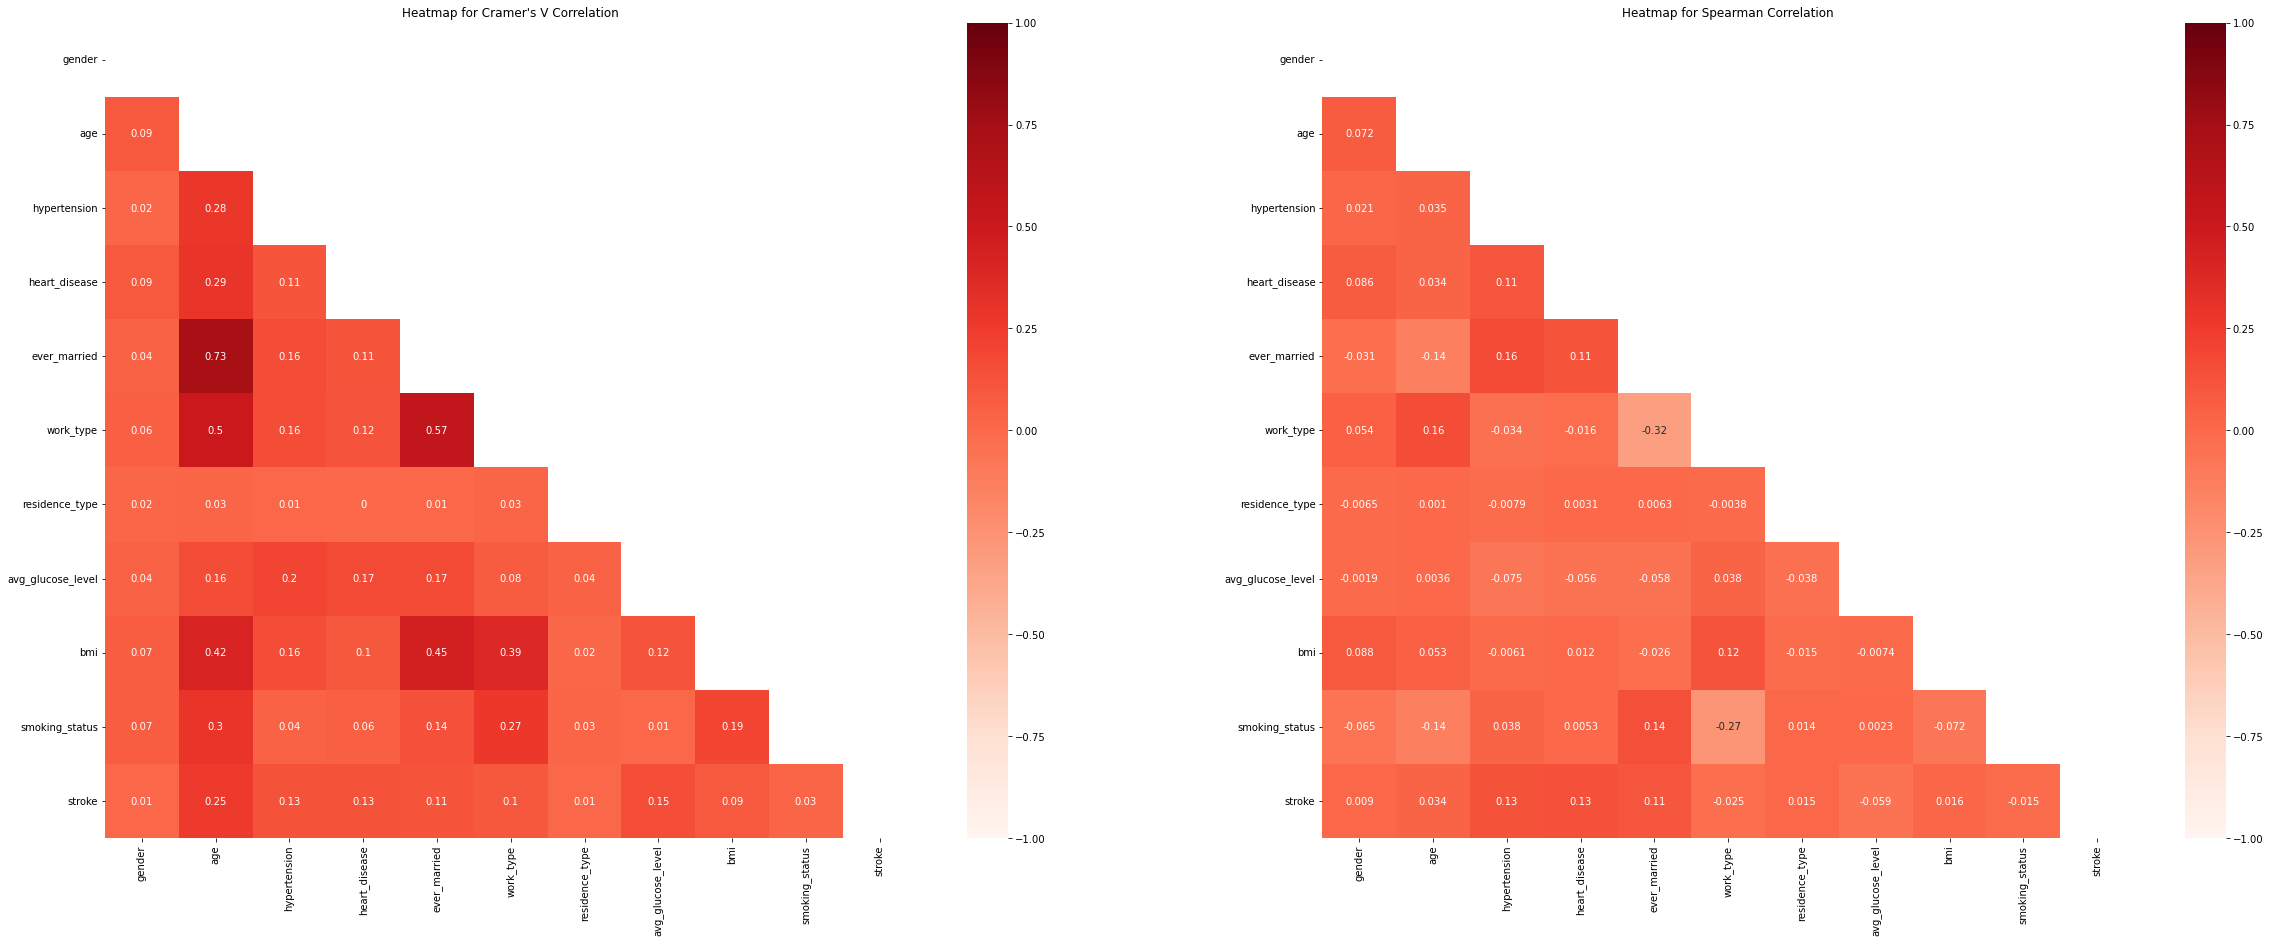

In [39]:
mask = np.zeros_like(data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot 2 heatmaps for both correlation types
f, ax = plt.subplots(1,2,figsize=(40,15))
heatmap1 = sns.heatmap(data, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds', ax=ax[0])
heatmap1.set_title("Heatmap for Cramer's V Correlation")

heatmap2 = sns.heatmap(correlation, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds', ax=ax[1])
heatmap2.set_title("Heatmap for Spearman Correlation")
plt.show()

In [40]:
#Correlation with target 'stroke' for Cramer's V correlation
corr_target = abs(data['stroke'])
#Selecting weakly correlated attribute with 'stroke'
relevant_features = corr_target[corr_target>0.1]
relevant_features

age                  0.25
hypertension         0.13
heart_disease        0.13
ever_married         0.11
avg_glucose_level    0.15
stroke               1.00
Name: stroke, dtype: float64

In [41]:
#Correlation with target 'stroke' for Spearman correlation
corr_target = abs(correlation['stroke'])
#Selecting weakly correlated attribute with 'stroke'
relevant_features = corr_target[corr_target>0.1]
relevant_features

hypertension     0.127904
heart_disease    0.134914
ever_married     0.108340
stroke           1.000000
Name: stroke, dtype: float64

Seems like age, hypertension history, heart disease history, average glucose level are related to potential stroke.<br>
For 'ever_married', it is moderately related to age. Hence we can assume that it is affected by age and is not a factor that affects the rate of potential stroke.

## <font color= grey> Data Visualization

In [42]:
#Import functions from plotly
import plotly.express as ex
import plotly.graph_objs as go
from plotly.subplots import make_subplots

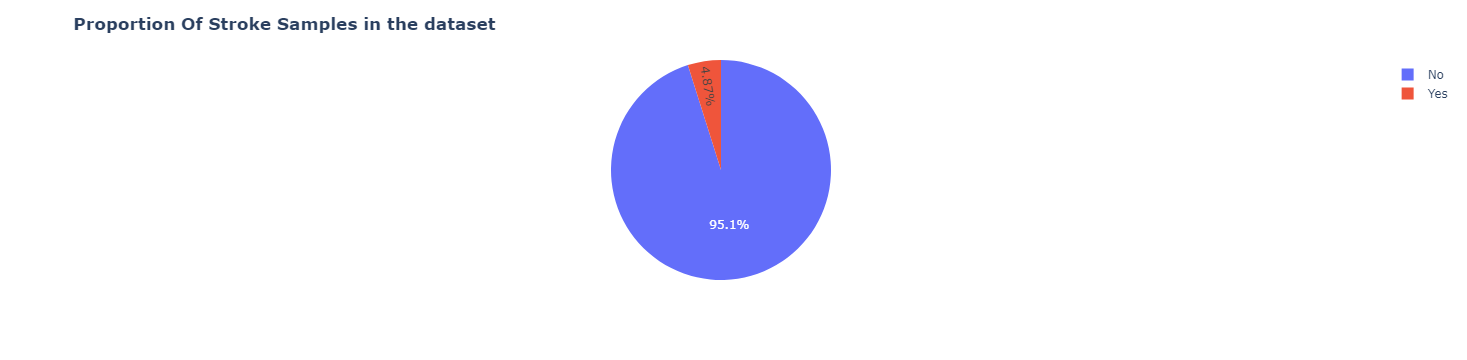

In [43]:
fig = ex.pie(df,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples in the dataset<b>')
fig.show()

As shown in the pie chart, the dataset is very biased. The percentage of stroke patients is only roughly 5% and it is highly imbalanced.<br>
Use SMOTE(Synthetic Minority Over-sampling Technique) to balance the dataset

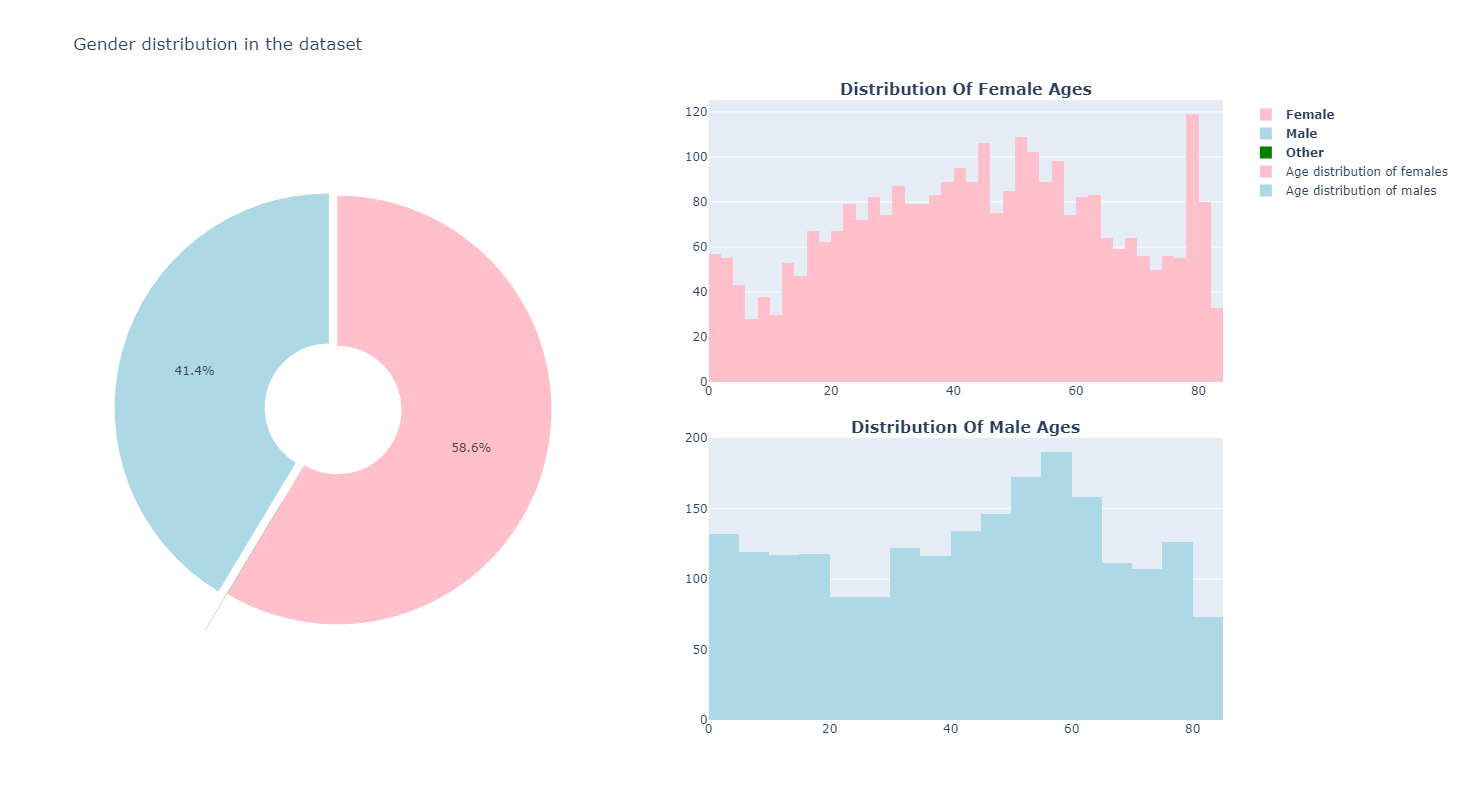

In [44]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2},{"type": "histogram"}] ,
           [None,{"type": "histogram"}]])

fig.add_trace(
    go.Pie(values=df.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.04,0.2],marker_colors=['pink','lightblue','green'],
           textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Female"').age,marker= dict(color='pink'),name='Age distribution of females'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Age distribution of males'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title='Gender distribution in the dataset'
)

fig.show()

There are slightly more females than males in the dataset.<br>
Looking at the age distribution histograms, the ages seem to be normally distributed and the skewness is rather similar between male and female(other than the clear outlier in female's age distribution).

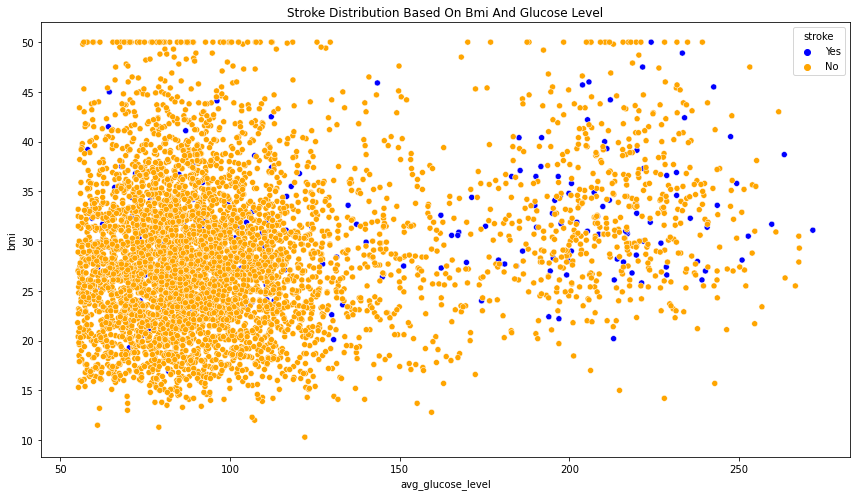

In [45]:
plt.figure(figsize=(12,7))
plt.title('Stroke Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'],palette=['Blue','Orange'])
plt.tight_layout()

As seen from the graph above, the stroke samples in the dataset appears at a higher frequency when one has high glucose level and bmi

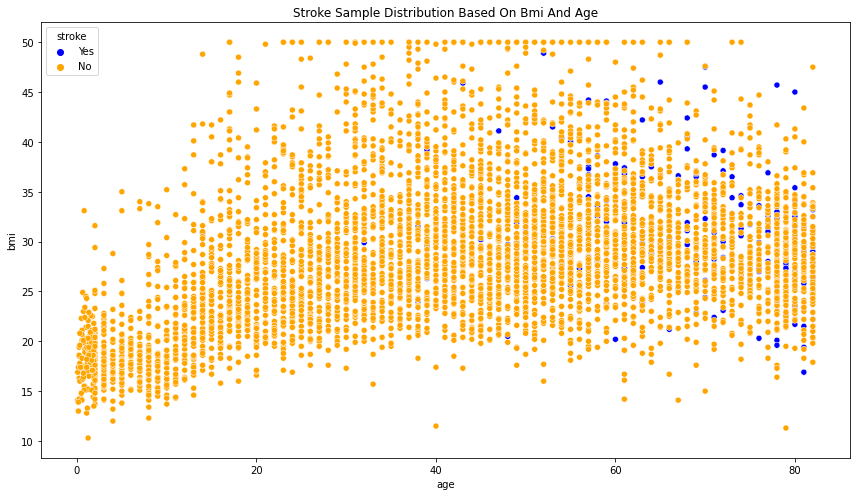

In [46]:
plt.figure(figsize=(12,7))
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'],palette=['Blue','Orange'])
plt.tight_layout()

As seen from this graph, the frequency of stroke sample appearance is much higher at age above 40. They tend to have a higher occurence at a higher bmi too.

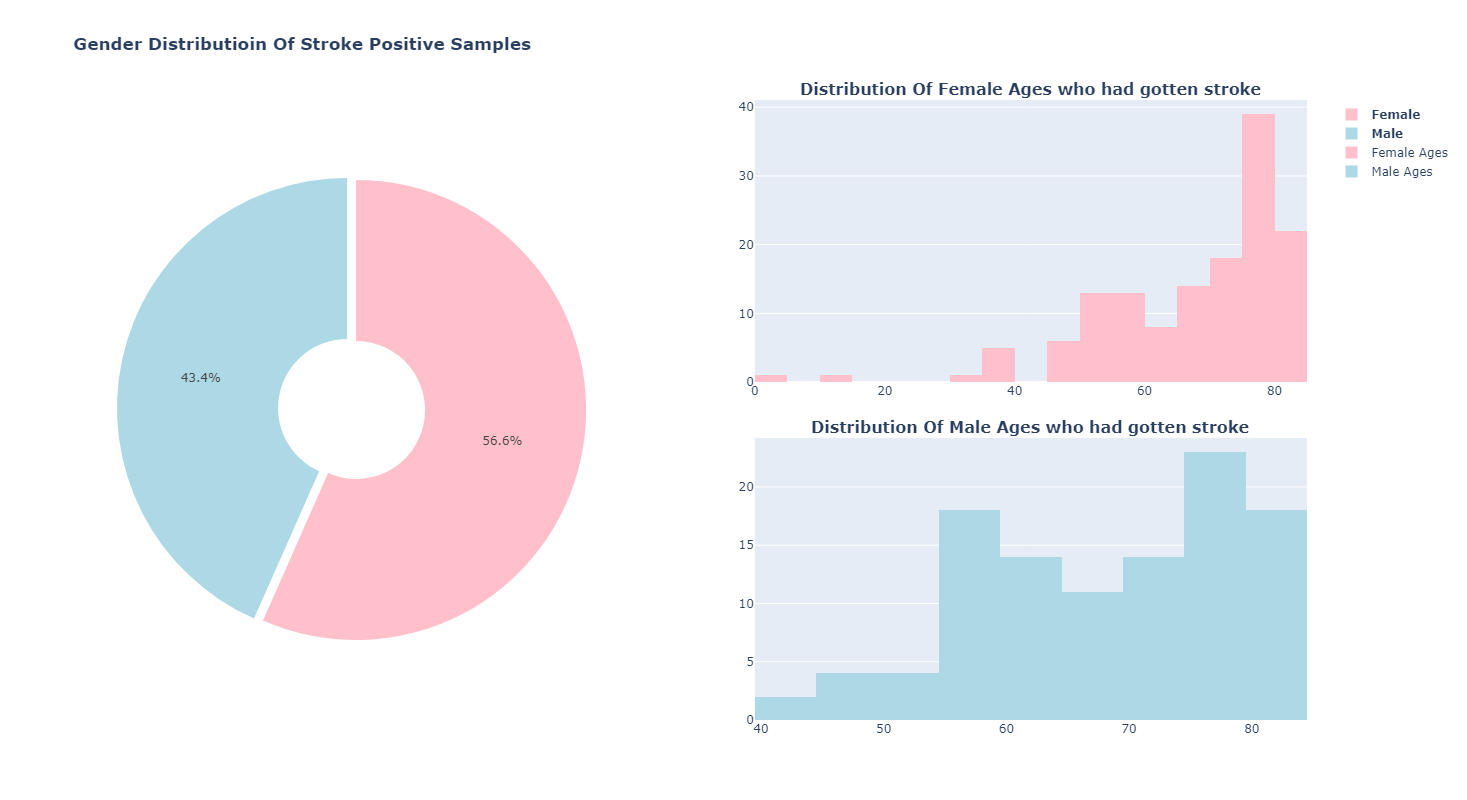

In [47]:
stroke_sample = df.query('stroke == "Yes"').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages who had gotten stroke<b>','<b>Distribution Of Male Ages who had gotten stroke<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2},{"type": "histogram"}] ,
           [None,{"type": "histogram"}]]
)

fig.add_trace(
    go.Pie(values=stroke_sample.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.04,0.2],marker_colors=['pink','lightblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=stroke_sample.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=stroke_sample.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Gender Distributioin Of Stroke Positive Samples<b>",
)

fig.show()

-	The percentage of female who had gotten stroke is slightly higher than the percentage of male who had gotten stroke.
-	From the histograms, female stroke samples start to increase from age 50 and above, but male stroke samples only start to increase from age 55 onwards.
-	Males seems to be more prone to strokes from their early 50s but the median stroke age for female is around 75-79.
-	There are two noticeable drops in stroke occurrence. One of them is at females aged ranging 60-64, and the other is at males aged ranging 65-69.
-	The two histograms further proofs that age is one of the major factors that contributes to stroke.

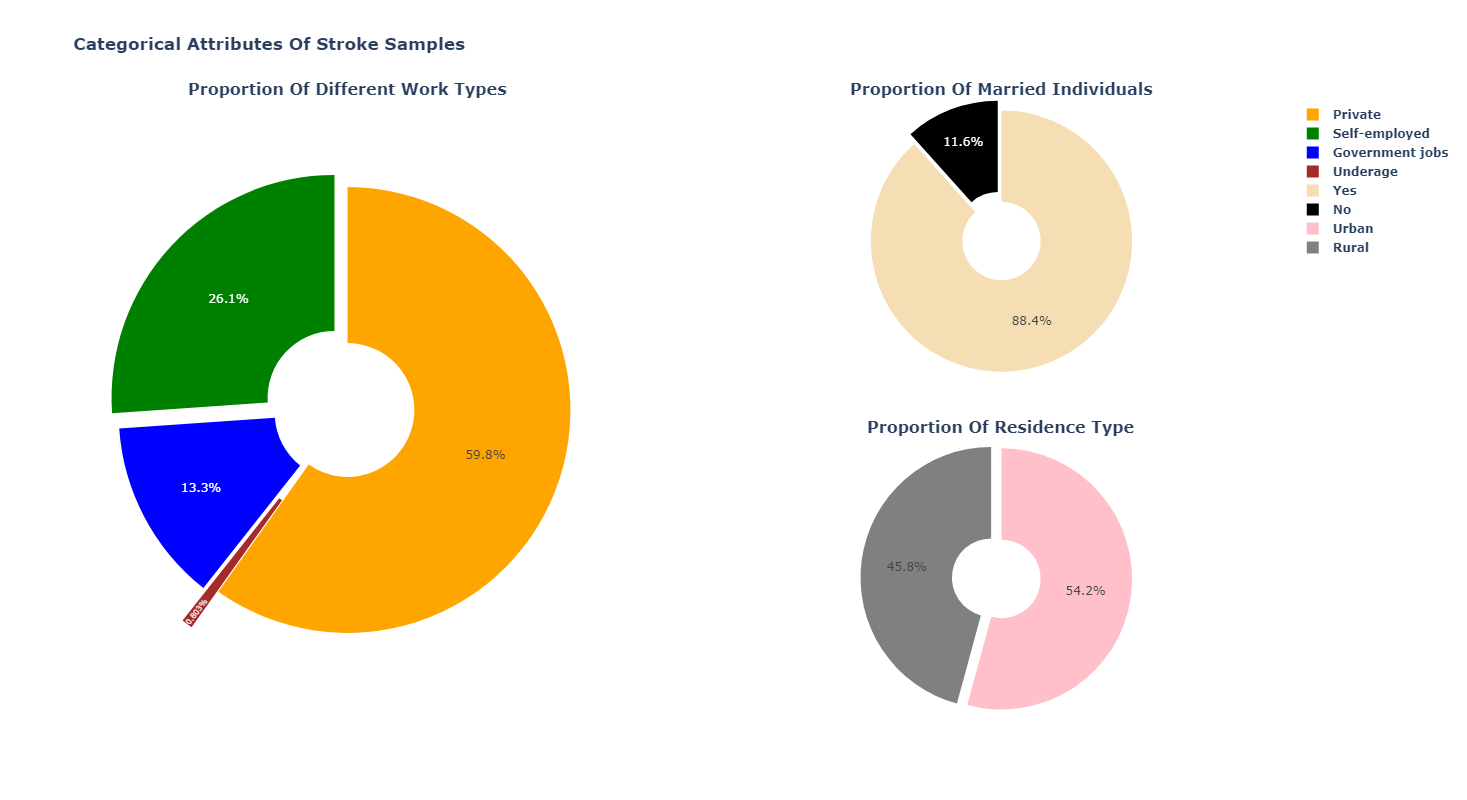

In [48]:
stroke_population = df.query('stroke == "Yes"').copy()

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('<b>Proportion Of Different Work Types<b>','<b>Proportion Of Married Individuals<b>','<b>Proportion Of Residence Type<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2},{"type": "pie"}] ,
           [None,{"type": "pie"}]]
)

fig.add_trace(
    go.Pie(values=stroke_population.work_type.value_counts().values,labels=['<b>Private<b>','<b>Self-employed<b>','<b>Government jobs<b>','<b>Underage<b>','<b>Never_worked<b>'],hole=0.3,pull=[0,0.08,0.03,0.2],marker_colors=['orange','green','blue','brown','purple'],textposition='inside'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values=stroke_population.ever_married.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],hole=0.3,pull=[0,0.08],marker_colors=['wheat','black'],textposition='inside'),
    row=1, col=2
)
fig.add_trace(
    go.Pie(values=stroke_population.residence_type.value_counts().values,labels=['<b>Urban<b>','<b>Rural<b>'],hole=0.3,pull=[0,0.08],marker_colors=['pink','gray'],textposition='inside'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Categorical Attributes Of Stroke Samples<b>",
)

fig.show()

Seems like these three columns do not show relation to stroke patients. The residence type is close to even distribution and most patients are married.

These graphs are evidences that can support the conclusion I have drawn after correlation analysis, which is age, average glucose level and bmi are the highest contributor to potential stroke

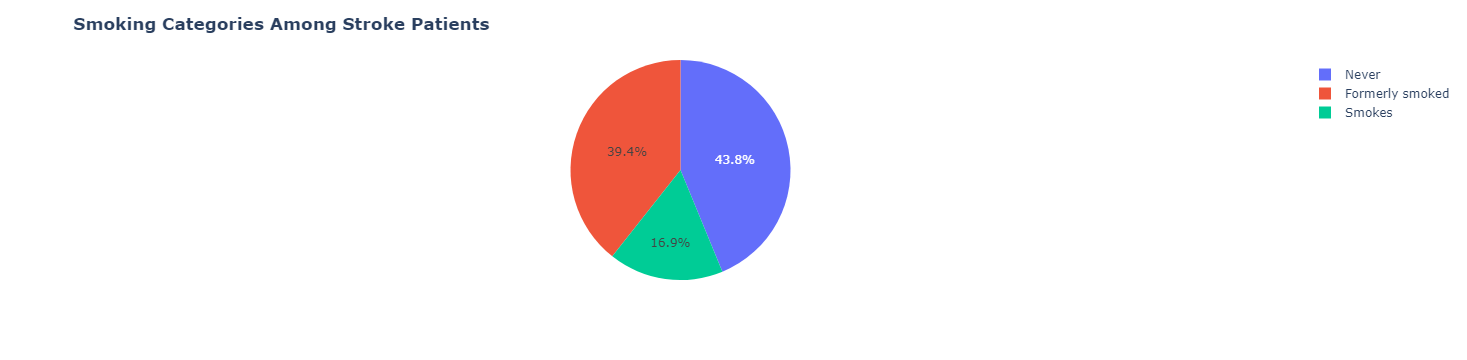

In [49]:
fig = ex.pie(stroke_population,names='smoking_status')
fig.update_layout(title='<b>Smoking Categories Among Stroke Patients<b>')
fig.show()

Seems like a good portion(roughly 39%) of patients who suffered from stroke were formal smokers. There is 17% of patients who are still smokers and roughly 44% have never smoked.<br>
Since the percentage of smokers and non-smokers does not have a big difference, hence we are unable to conclude that smoking status is a factor that contributes to stroke.

### Splitting the dataset

In [50]:
df

gender   age hypertension heart_disease ever_married       work_type  \
0       Male  67.0           No           Yes          Yes         Private   
1     Female  61.0           No            No          Yes   Self-employed   
2       Male  80.0           No           Yes          Yes         Private   
3     Female  49.0           No            No          Yes         Private   
4     Female  79.0          Yes            No          Yes   Self-employed   
...      ...   ...          ...           ...          ...             ...   
5105  Female  80.0          Yes            No          Yes         Private   
5106  Female  81.0           No            No          Yes   Self-employed   
5107  Female  35.0           No            No          Yes   Self-employed   
5108    Male  51.0           No            No          Yes         Private   
5109  Female  44.0           No            No          Yes  Government job   

     residence_type  avg_glucose_level    bmi   smoking_status stroke  
0             Urban             228.69  36.60  Formerly smoked    Yes  
1             Rural             202.21  31.90            Never    Yes  
2             Rural             105.92  32.50            Never    Yes  
3             Urban             171.23  34.40           Smokes    Yes  
4             Rural             174.12  24.00            Never    Yes  
...             ...                ...    ...              ...    ...  
5105          Urban              83.75  29.16            Never     No  
5106          Urban             125.20  40.00            Never     No  
5107          Rural              82.99  30.60            Never     No  
5108          Rural             166.29  25.60  Formerly smoked     No  
5109          Urban              85.28  26.20            Never     No  

[5110 rows x 11 columns]

In [51]:
#Encode dataset before splitting
df_c = enc.encoding(df)

In [52]:
#Split dataset into features and variable to predict. Convert both to numpy array
y = df_c.stroke
x = df_c.drop(columns='stroke')

#Split dataset into x_train,x_test,y_train,y_test with test sample 25% and a fixed random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=6)

In [53]:
y_train.value_counts()

0    3648
1     184
Name: stroke, dtype: int64

In [54]:
#Make use of SMOTE to balance the highly biased data
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=6)
#Resample the dataset
x_train,y_train = oversample.fit_resample(x_train,y_train.ravel())
x_test,y_test = oversample.fit_resample(x_train,y_train.ravel())

In [55]:
np.count_nonzero(y_train == 0)

3648

In [56]:
np.count_nonzero(y_train == 1)

3648

In [57]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# <font color= maroon> Data Modelling

#### Importing machine learning related algorithms

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Since we are expecting a categorical output, we are using classification models

## <font color= grey> Finding the Best Model

The models to be evaluated are:
1. Logistic Regression(LR)
2. Decision Tree Classifier(DT)
3. Random Forest Classifier(RF)
4. Linear Discriminant Analysis(LDA)
5. XGBoost Classifier(XGB)
6. K-Neighbors Classifier(KN)
7. Support Vector Classification(SVC)
<br><br>
Models are separated and trained using pipeline

In [59]:
#Defining pipeline for different models
lr_pipe = Pipeline(steps = [('Logistic Regression', LogisticRegression(random_state = 6))])
dt_pipe = Pipeline(steps = [('Decision Tree Classifier', DecisionTreeClassifier(random_state = 6))])
rf_pipe = Pipeline(steps = [('Random Forest Classifier', RandomForestClassifier(random_state = 6))])
lda_pipe = Pipeline(steps = [('Linear Discriminant Analysis', LinearDiscriminantAnalysis())])
xgb_pipe = Pipeline(steps = [('XGBoost Classifier', GradientBoostingClassifier())])
kn_pipe = Pipeline(steps = [('K-Neighbors Classifier', KNeighborsClassifier())])
svm_pipe = Pipeline(steps = [('Support Vector Machines', SVC(random_state = 6))])

In [60]:
#Getting accuracy score of each model
lr_acc = cross_val_score(lr_pipe,x_train,y_train,cv=10,scoring='accuracy')
dt_acc = cross_val_score(dt_pipe,x_train,y_train,cv=10,scoring='accuracy')
rf_acc = cross_val_score(rf_pipe,x_train,y_train,cv=10,scoring='accuracy')
lda_acc = cross_val_score(lda_pipe,x_train,y_train,cv=10,scoring='accuracy')
xgb_acc = cross_val_score(xgb_pipe,x_train,y_train,cv=10,scoring='accuracy')
kn_acc = cross_val_score(kn_pipe,x_train,y_train,cv=10,scoring='accuracy')
svm_acc = cross_val_score(svm_pipe,x_train,y_train,cv=10,scoring='accuracy')

In [61]:
#Getting f1 score of each model
lr_f1 = cross_val_score(lr_pipe,x_train,y_train,cv=10,scoring='f1')
dt_f1 = cross_val_score(dt_pipe,x_train,y_train,cv=10,scoring='f1')
rf_f1 = cross_val_score(rf_pipe,x_train,y_train,cv=10,scoring='f1')
lda_f1 = cross_val_score(lda_pipe,x_train,y_train,cv=10,scoring='f1')
xgb_f1 = cross_val_score(xgb_pipe,x_train,y_train,cv=10,scoring='f1')
kn_f1 = cross_val_score(kn_pipe,x_train,y_train,cv=10,scoring='f1')
svm_f1 = cross_val_score(svm_pipe,x_train,y_train,cv=10,scoring='f1')

In [62]:
#Getting roc auc score of each model
lr_roc_auc = cross_val_score(lr_pipe,x_train,y_train,cv=10,scoring='roc_auc')
dt_roc_auc = cross_val_score(dt_pipe,x_train,y_train,cv=10,scoring='roc_auc')
rf_roc_auc = cross_val_score(rf_pipe,x_train,y_train,cv=10,scoring='roc_auc')
lda_roc_auc = cross_val_score(lda_pipe,x_train,y_train,cv=10,scoring='roc_auc')
xgb_roc_auc = cross_val_score(xgb_pipe,x_train,y_train,cv=10,scoring='roc_auc')
kn_roc_auc = cross_val_score(kn_pipe,x_train,y_train,cv=10,scoring='roc_auc')
svm_roc_auc = cross_val_score(svm_pipe,x_train,y_train,cv=10,scoring='roc_auc')

In [63]:
#Combining them into a dataframe for easier visualization
evaluation = pd.DataFrame([['Logistic Regression',lr_acc.mean(),lr_f1.mean(),lr_roc_auc.mean()],
                      ['Decision Tree Classifier',dt_acc.mean(),dt_f1.mean(),dt_roc_auc.mean()],
                      ['Random Forest Classifier',rf_acc.mean(),rf_f1.mean(),rf_roc_auc.mean()],
                      ['Linear Discriminant Analysis',lda_acc.mean(),lda_f1.mean(),lda_roc_auc.mean()],
                      ['XGBoost Classifier',xgb_acc.mean(),xgb_f1.mean(),xgb_roc_auc.mean()],
                      ['K-Neighbors Classifier',kn_acc.mean(),kn_f1.mean(),kn_roc_auc.mean()],
                      ['Support Vector Machines',svm_acc.mean(),svm_f1.mean(),svm_roc_auc.mean()]],
                     columns = ['Models','Train Set Mean Accuracy Score','Train Set Mean F1 Score','Train Set Mean ROC AUC Score'])
evaluation

Models  Train Set Mean Accuracy Score  \
0           Logistic Regression                       0.780017   
1      Decision Tree Classifier                       0.890626   
2      Random Forest Classifier                       0.940789   
3  Linear Discriminant Analysis                       0.780015   
4            XGBoost Classifier                       0.858554   
5        K-Neighbors Classifier                       0.890211   
6       Support Vector Machines                       0.835387   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  
0                 0.786301                      0.860049  
1                 0.891725                      0.890618  
2                 0.942350                      0.987566  
3                 0.787997                      0.860293  
4                 0.864356                      0.937160  
5                 0.899185                      0.951620  
6                 0.846539                      0.912268

In [64]:
#Calculate sum of different scores for each model. This is a straight forward way to visualise which model did better
def sum_of_scores(data):
    train = []
    test = []
    for col in evaluation:
        if col.find('Sum') != -1:
            data = data.drop(columns=col)
        elif col.find('Train') != -1:
            train.append(col)
        elif col.find('Test') != -1:
            test.append(col)

    data['Sum of Train Scores'] = data[train].sum(axis=1)
    if len(test) != 0:
        data['Sum of Test Scores'] = data[test].sum(axis=1)
    data
    return data

In [65]:
evaluation_sum = sum_of_scores(evaluation)
evaluation_sum

Models  Train Set Mean Accuracy Score  \
0           Logistic Regression                       0.780017   
1      Decision Tree Classifier                       0.890626   
2      Random Forest Classifier                       0.940789   
3  Linear Discriminant Analysis                       0.780015   
4            XGBoost Classifier                       0.858554   
5        K-Neighbors Classifier                       0.890211   
6       Support Vector Machines                       0.835387   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  Sum of Train Scores  
0                 0.786301                      0.860049             2.426366  
1                 0.891725                      0.890618             2.672969  
2                 0.942350                      0.987566             2.870705  
3                 0.787997                      0.860293             2.428305  
4                 0.864356                      0.937160             2.660070  
5                 0.899185                      0.951620             2.741016  
6                 0.846539                      0.912268             2.594193

#### Random Forest Classifier seems to be the model that performed the best on training dataset<br>
Now lets try on testing dataset

In [66]:
#Training models
lr_pipe.fit(x_train,y_train)
dt_pipe.fit(x_train,y_train)
rf_pipe.fit(x_train,y_train)
lda_pipe.fit(x_train,y_train)
xgb_pipe.fit(x_train,y_train)
kn_pipe.fit(x_train,y_train)
svm_pipe.fit(x_train,y_train)

Pipeline(steps=[('Support Vector Machines', SVC(random_state=6))])

In [67]:
#Make prediction with trained model
lr_pred = lr_pipe.predict(x_test)
dt_pred = dt_pipe.predict(x_test)
rf_pred = rf_pipe.predict(x_test)
lda_pred = lda_pipe.predict(x_test)
xgb_pred = lda_pipe.predict(x_test)
kn_pred = kn_pipe.predict(x_test)
svm_pred = svm_pipe.predict(x_test)

#Getting accuracy score of each model
lr_acc = accuracy_score(y_test,lr_pred)
dt_acc = accuracy_score(y_test,dt_pred)
rf_acc = accuracy_score(y_test,rf_pred)
lda_acc = accuracy_score(y_test,lda_pred)
xgb_acc = accuracy_score(y_test,xgb_pred)
kn_acc = accuracy_score(y_test,kn_pred)
svm_acc = accuracy_score(y_test,svm_pred)

#Getting f1 score of each model
lr_f1 = f1_score(y_test,lr_pred)
dt_f1 = f1_score(y_test,dt_pred)
rf_f1 = f1_score(y_test,rf_pred)
lda_f1 = f1_score(y_test,lda_pred)
xgb_f1 = f1_score(y_test,xgb_pred)
kn_f1 = f1_score(y_test,kn_pred)
svm_f1 = f1_score(y_test,svm_pred)

#Getting roc auc score of each model
lr_roc_auc = roc_auc_score(y_test,lr_pred)
dt_roc_auc = roc_auc_score(y_test,dt_pred)
rf_roc_auc = roc_auc_score(y_test,rf_pred)
lda_roc_auc = roc_auc_score(y_test,lda_pred)
xgb_roc_auc = roc_auc_score(y_test,xgb_pred)
kn_roc_auc = roc_auc_score(y_test,kn_pred)
svm_roc_auc = roc_auc_score(y_test,svm_pred)

In [68]:
#Store them in the same dataframe as training set scores
evaluation['Test Set Mean Accuracy Score'] = [lr_acc,dt_acc,rf_acc,lda_acc,xgb_acc,kn_acc,svm_acc]
evaluation['Test Set Mean F1 Score'] = [lr_f1,dt_f1,rf_f1,lda_f1,xgb_f1,kn_f1,svm_f1]
evaluation['Test Set Mean ROC AUC Score'] = [lr_roc_auc,dt_roc_auc,rf_roc_auc,lda_roc_auc,xgb_roc_auc,kn_roc_auc,svm_roc_auc]

evaluation

Models  Train Set Mean Accuracy Score  \
0           Logistic Regression                       0.780017   
1      Decision Tree Classifier                       0.890626   
2      Random Forest Classifier                       0.940789   
3  Linear Discriminant Analysis                       0.780015   
4            XGBoost Classifier                       0.858554   
5        K-Neighbors Classifier                       0.890211   
6       Support Vector Machines                       0.835387   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  Sum of Train Scores  \
0                 0.786301                      0.860049             2.426366   
1                 0.891725                      0.890618             2.672969   
2                 0.942350                      0.987566             2.870705   
3                 0.787997                      0.860293             2.428305   
4                 0.864356                      0.937160             2.660070   
5                 0.899185                      0.951620             2.741016   
6                 0.846539                      0.912268             2.594193   

   Test Set Mean Accuracy Score  Test Set Mean F1 Score  \
0                      0.781524                0.787523   
1                      1.000000                1.000000   
2                      1.000000                1.000000   
3                      0.780016                0.787783   
4                      0.780016                0.787783   
5                      0.925302                0.929886   
6                      0.844709                0.855208   

   Test Set Mean ROC AUC Score  
0                     0.781524  
1                     1.000000  
2                     1.000000  
3                     0.780016  
4                     0.780016  
5                     0.925302  
6                     0.844709

In [69]:
evaluation_sum = sum_of_scores(evaluation)
evaluation_sum

Models  Train Set Mean Accuracy Score  \
0           Logistic Regression                       0.780017   
1      Decision Tree Classifier                       0.890626   
2      Random Forest Classifier                       0.940789   
3  Linear Discriminant Analysis                       0.780015   
4            XGBoost Classifier                       0.858554   
5        K-Neighbors Classifier                       0.890211   
6       Support Vector Machines                       0.835387   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  \
0                 0.786301                      0.860049   
1                 0.891725                      0.890618   
2                 0.942350                      0.987566   
3                 0.787997                      0.860293   
4                 0.864356                      0.937160   
5                 0.899185                      0.951620   
6                 0.846539                      0.912268   

   Test Set Mean Accuracy Score  Test Set Mean F1 Score  \
0                      0.781524                0.787523   
1                      1.000000                1.000000   
2                      1.000000                1.000000   
3                      0.780016                0.787783   
4                      0.780016                0.787783   
5                      0.925302                0.929886   
6                      0.844709                0.855208   

   Test Set Mean ROC AUC Score  Sum of Train Scores  Sum of Test Scores  
0                     0.781524             2.426366            2.350572  
1                     1.000000             2.672969            3.000000  
2                     1.000000             2.870705            3.000000  
3                     0.780016             2.428305            2.347816  
4                     0.780016             2.660070            2.347816  
5                     0.925302             2.741016            2.780489  
6                     0.844709             2.594193            2.544627

#### Logistic Regression is the model that has the best performance on test dataset

### Trying to improve both models through randomized search

#### Random Forest Classifier

In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [5, 20, 50]
n_estimators.append([int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)])

max_depth = [int(x) for x in np.linspace(10, 130, num = 13)]
max_depth.append(None)

min_samples_split = [2, 5, 6, 10]

min_samples_leaf = [1, 2, 3, 4]

bootstrap = [True, False]

param_grid = {'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}

gs = RandomizedSearchCV(rf_pipe['Random Forest Classifier'], param_grid, n_jobs = -1,
                        n_iter = 100, verbose=1, random_state=6)

In [71]:
#gs.fit(x_train,y_train)

In [72]:
#print(gs.best_params_)
#Result gotten:

In [73]:
#Retrain the model with parameters gotten from RandomizedSearch

rf = RandomForestClassifier(n_estimators=50, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_depth=50, 
                            bootstrap=False,
                           random_state=6)

rf.fit(x_train,y_train)

rf_train_acc = accuracy_score(y_train,rf.predict(x_train))

rf_train_f1 = f1_score(y_train,rf.predict(x_train))

rf_train_roc_auc = roc_auc_score(y_train,rf.predict(x_train))

rf_pred = rf.predict(x_test)

rf_test_acc = accuracy_score(y_test,rf_pred)

rf_test_f1 = f1_score(y_test,rf_pred)

rf_test_roc_auc = roc_auc_score(y_test,rf_pred)

tuned = pd.DataFrame()
tuned['Model'] = ['Random Forest Classifier']
tuned['Tuned Train Accuracy Score'] = [rf_train_acc]
tuned['Tuned Train f1 Score'] = [rf_train_f1]
tuned['Tuned Train ROC AUC Score'] = [rf_train_roc_auc]
tuned['Tuned Test Accuracy Score'] = [rf_acc]
tuned['Tuned Test f1 Score'] = [rf_f1]
tuned['Tuned Test ROC AUC Score'] = [rf_roc_auc]

print(confusion_matrix(y_test,rf_pred),'\n\n',
      classification_report(y_test,rf_pred),end='\n\n')
print(f'Accuracy score after hypertune is: {rf_acc:.4f}')
print(f'F1 score after hypertune is: {rf_f1:.4f}')
print(f'ROC AUC score after hypertune is: {rf_roc_auc:.4f}')

[[3648    0]
 [   0 3648]] 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3648
           1       1.00      1.00      1.00      3648

    accuracy                           1.00      7296
   macro avg       1.00      1.00      1.00      7296
weighted avg       1.00      1.00      1.00      7296


Accuracy score after hypertune is: 1.0000
F1 score after hypertune is: 1.0000
ROC AUC score after hypertune is: 1.0000


In [74]:
#Get the results of the model before hypertune
evaluation_sum.loc[evaluation.Models=='Random Forest Classifier']

Models  Train Set Mean Accuracy Score  \
2  Random Forest Classifier                       0.940789   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  \
2                  0.94235                      0.987566   

   Test Set Mean Accuracy Score  Test Set Mean F1 Score  \
2                           1.0                     1.0   

   Test Set Mean ROC AUC Score  Sum of Train Scores  Sum of Test Scores  
2                          1.0             2.870705                 3.0

In [75]:
tuned

Model  Tuned Train Accuracy Score  Tuned Train f1 Score  \
0  Random Forest Classifier                         1.0                   1.0   

   Tuned Train ROC AUC Score  Tuned Test Accuracy Score  Tuned Test f1 Score  \
0                        1.0                        1.0                  1.0   

   Tuned Test ROC AUC Score  
0                       1.0

Random Forest Classifier seems to fit perfectly now

#### Logistic Regression

In [76]:
penalty = ['l1','l2','elasticnet']

c = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = {'penalty':penalty, 'C':c}

gs = RandomizedSearchCV(lr_pipe['Logistic Regression'], param_grid, n_jobs = -1,
                        n_iter = 100, verbose=1, random_state=6)

In [77]:
#gs.fit(x_train,y_train)

In [78]:
#print(gs.best_params_)
#Results gotten:
#{'penalty': 'l2', 'C': 0.001}

In [79]:
#Retrain the model with parameters gotten from RandomizedSearch

lr = LogisticRegression(penalty = 'l2', C = 0.001)

lr.fit(x_train,y_train)

lr_train_acc = accuracy_score(y_train,lr.predict(x_train))

lr_train_f1 = f1_score(y_train,lr.predict(x_train))

lr_train_roc_auc = roc_auc_score(y_train,lr.predict(x_train))

lr_pred = lr.predict(x_test)

lr_acc = accuracy_score(y_test,lr_pred)

lr_f1 = f1_score(y_test,lr_pred)

lr_roc_auc = roc_auc_score(y_test,lr_pred)

tuned = tuned.append({'Model':'Logistic Regressor','Tuned Train Accuracy Score':lr_train_acc,
                      'Tuned Train f1 Score':lr_train_f1,'Tuned Train ROC AUC Score':lr_train_roc_auc,
                      'Tuned Test Accuracy Score':lr_acc,'Tuned Test f1 Score':lr_f1,
                      'Tuned Test ROC AUC Score':lr_roc_auc},ignore_index = True)

print(confusion_matrix(y_test,lr_pred),'\n\n',
      classification_report(y_test,lr_pred),end='\n\n')
print(f'Accuracy score after hypertune is: {lr_acc:.4f}')
print(f'F1 score after hypertune is: {lr_f1:.4f}')
print(f'ROC AUC score after hypertune is: {lr_roc_auc:.4f}')

[[2654  994]
 [ 649 2999]] 

               precision    recall  f1-score   support

           0       0.80      0.73      0.76      3648
           1       0.75      0.82      0.78      3648

    accuracy                           0.77      7296
   macro avg       0.78      0.77      0.77      7296
weighted avg       0.78      0.77      0.77      7296


Accuracy score after hypertune is: 0.7748
F1 score after hypertune is: 0.7850
ROC AUC score after hypertune is: 0.7748


In [80]:
#Get the results of the model before hypertune
evaluation.loc[evaluation.Models=='Logistic Regression']

Models  Train Set Mean Accuracy Score  \
0  Logistic Regression                       0.780017   

   Train Set Mean F1 Score  Train Set Mean ROC AUC Score  Sum of Train Scores  \
0                 0.786301                      0.860049             2.426366   

   Test Set Mean Accuracy Score  Test Set Mean F1 Score  \
0                      0.781524                0.787523   

   Test Set Mean ROC AUC Score  
0                     0.781524

In [81]:
tuned

Model  Tuned Train Accuracy Score  Tuned Train f1 Score  \
0  Random Forest Classifier                    1.000000              1.000000   
1        Logistic Regressor                    0.774808              0.784976   

   Tuned Train ROC AUC Score  Tuned Test Accuracy Score  Tuned Test f1 Score  \
0                   1.000000                   1.000000             1.000000   
1                   0.774808                   0.774808             0.784976   

   Tuned Test ROC AUC Score  
0                  1.000000  
1                  0.774808

Logistic Regression has a great improvement in the various scores!

## Feature importance using Random Forest Classifier (before fine-tuning)

In [82]:
import joblib

In [83]:
joblib.dump(rf_pipe['Random Forest Classifier'],'randomforest.pkl')

['randomforest.pkl']

In [84]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

model = joblib.load('randomforest.pkl')

importance = model.feature_importances_

feature_importance = importance.argsort()

for index in feature_importance:
    print(f'{features[index]} - {importance[index]:.5f}%')

heart_disease - 0.01166%
hypertension - 0.01462%
ever_married - 0.02169%
residence_type - 0.02229%
gender - 0.02508%
smoking_status - 0.04355%
work_type - 0.07067%
bmi - 0.17997%
avg_glucose_level - 0.18925%
age - 0.42122%


The results gotten from feature importance supports the conclusion I have drawn after correlation analysis. Age, average glucose level and BMI are the three highest factors that are related to stroke

### Feature importance of Random Forest Classifier (after fine-tuning)

In [85]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 
                         'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)


fi = rf_feat_importance(rf, df.drop(columns='stroke'))
fi[:10].style.background_gradient(cmap='Blues')

Age, average glucose level and bmi are still the top 3 important features that contributes to potential stroke

## In conclusion

In [86]:
models = round((evaluation.copy().drop(columns=['Sum of Train Scores','Sum of Test Scores'])),4)
models = models.set_index('Models')
models

KeyError: "['Sum of Test Scores'] not found in axis"

The models did not improve much in their performance even with fine tuning.

NameError: name 'models' is not defined

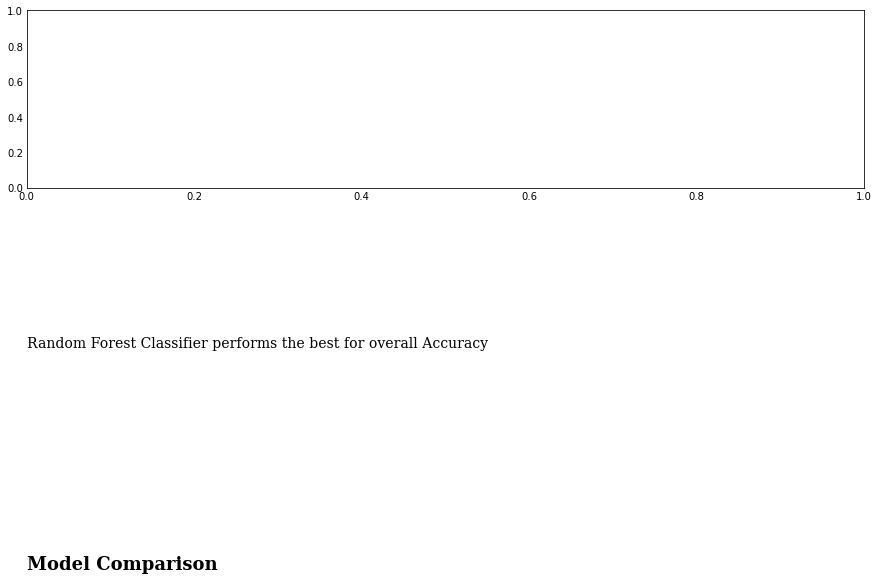

In [87]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(4,2)
ax0 = fig.add_subplot(gs[0,:])

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Random Forest Classifier performs the best for overall Accuracy',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap(models,cmap='Blues',annot=True,vmin=0,vmax=1,ax=ax0,cbar=False,linewidth=2.5)

Text(0, -0.75, 'Support Vector Machine Performance')

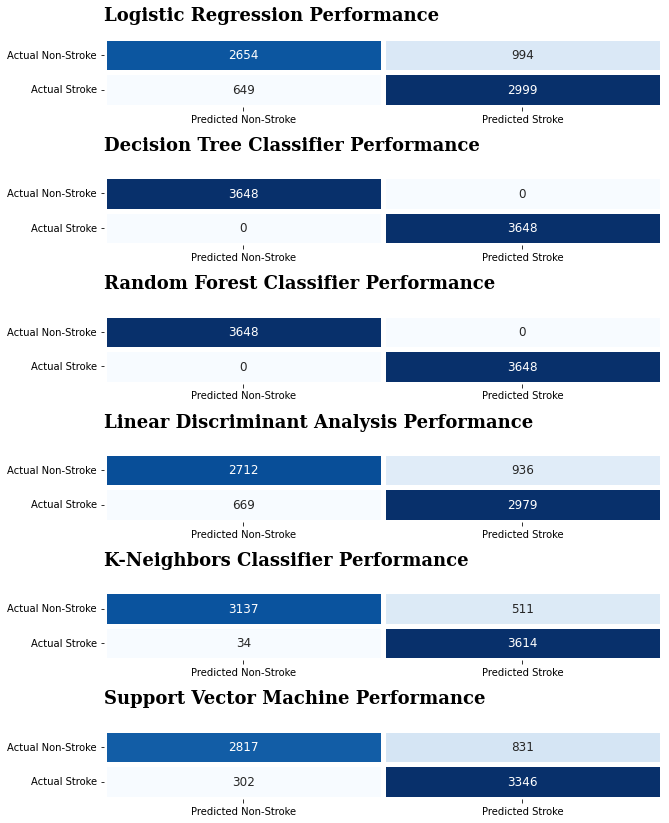

In [88]:
#Plotting confusion matrix of all models
fig = plt.figure(figsize=(10,14))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.1,hspace=1)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[2,:])
ax3 = fig.add_subplot(gs[3,:])
ax4 = fig.add_subplot(gs[4,:])
ax5 = fig.add_subplot(gs[5,:])

lr_cf = confusion_matrix(y_test,lr_pred)
dt_cf = confusion_matrix(y_test,dt_pred)
rf_cf = confusion_matrix(y_test,rf_pred)
lda_cf = confusion_matrix(y_test,lda_pred)
kn_cf = confusion_matrix(y_test,kn_pred)
svm_cf = confusion_matrix(y_test,svm_pred)

sns.heatmap(lr_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax0.text(0,-0.5,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

sns.heatmap(dt_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax1.text(0,-0.75,'Decision Tree Classifier Performance',fontsize=18,fontweight='bold',fontfamily='serif')


sns.heatmap(rf_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax2,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax2.text(0,-0.75,'Random Forest Classifier Performance',fontsize=18,fontweight='bold',fontfamily='serif')


sns.heatmap(lda_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax3,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax3.text(0,-0.75,'Linear Discriminant Analysis Performance',fontsize=18,fontweight='bold',fontfamily='serif')


sns.heatmap(kn_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax4,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax4.text(0,-0.75,'K-Neighbors Classifier Performance',fontsize=18,fontweight='bold',fontfamily='serif')


sns.heatmap(svm_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax5,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax5.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')


#### As shown from the visualizations, all the models have a relatively high accuracy, with Logistic Regression and Random Forest Classifier being the best ones.<br>
#### However, with reference to other attributes such as f1 score, I will be choosing Random Forest Classifier as my final prediction model

In [ ]:
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

plot = tuned.loc[tuned.Model=='Random Forest Classifier']
plot = plot.drop(columns='Model')

sns.heatmap(plot, cmap='Blues',annot=True,fmt=".1%",vmin=0,vmax=0.95,yticklabels='', linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
sns.heatmap(lr_cf,cmap='Blues',annot=True, linewidths=5,fmt="d",cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax0.text(0,-0.5,'Tuned Random Forest Classifier Overview',fontsize=18,fontweight='bold',fontfamily='serif')

Reference:
1. Crame's V Correlation Martix
https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook